### Trenowanie modelu

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, mean_squared_error

def model_training(data_path, X, y, model):
    # load data
    data = pd.read_csv(data_path)

    # split data
    X_data = data[X]
    y_data = data[y]

    # split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

    # train model
    model.fit(X_train, y_train)

    # predict
    y_pred = model.predict(X_test)

    return y_test, y_pred

### Ocena modelu

In [41]:
def model_evaluation(y_test, y_pred):
    # accuracy
    accuracy = (y_test == y_pred).mean()
    print(f"Accuracy: {accuracy}")

    # mean squared error
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")

    # f1 score
    # f1 = f1_score(y_test, y_pred)
    # print(f"F1 Score: {f1}")

### Wykresy

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_results(y_test, y_pred):
    
    df_plot = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

    sns.lmplot(x='Actual', y='Predicted', data=df_plot, aspect=1.5, height=7, ci=None, line_kws={'color': 'red'})
    plt.title('Actual vs Predicted')
    plt.show()

### Test

Accuracy: 0.0
Mean Squared Error: 24.162210052425408


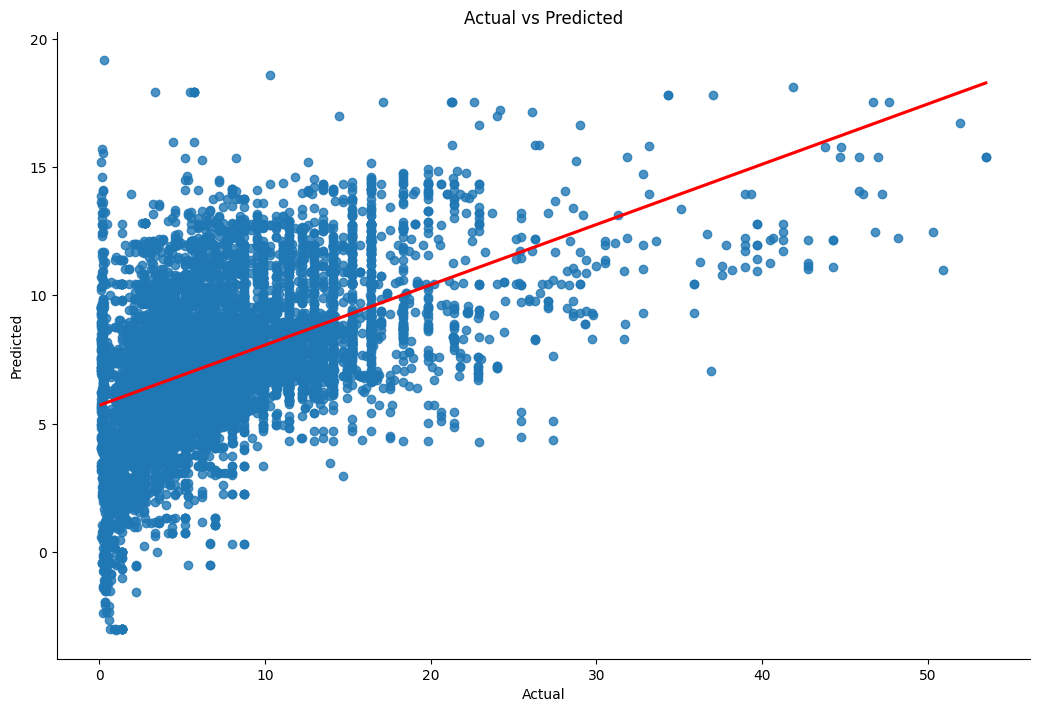

In [43]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression


DATA_PATH = '../Campaign3/o2_download_nexus5x.csv'
X = ['rsrp', 'rsrq', 'cqi', 'longitude', 'latitude', 'speed']
y = 'throughput'


y_test, y_pred = model_training(DATA_PATH, X, y, LinearRegression())

model_evaluation(y_test, y_pred)

plot_results(y_test, y_pred)

